This is a trial notebook which is introducing the eurostat python package, source: https://pypi.org/project/eurostat/.
At first import packages as always.

In [1]:
import eurostat

The first step is to read the Eurostat table of contents into a dataframe by [**get_toc_df()**](https://pypi.org/project/eurostat/) function. It retrieves the titles, codes and timestamps of all Eurostat datasets.

## Browsing through Eurostat

In [2]:
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_SE,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,1997,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_SI,dataset,2023-08-24T23:00:00+0200,2023-08-24T23:00:00+0200,2001,2022
2,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
3,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
4,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-03-18T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q4
...,...,...,...,...,...,...,...
7638,Percentage of letters delivered on-time (USP u...,POST_CUBE1_X$POST_QOS_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7639,Postal services,POST_CUBE1_X,dataset,2024-03-14T12:05:33Z,2024-03-14T12:05:33Z,2012,2022
7640,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7641,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None


You can filter the datasets by *keyword*. Function [**subset_toc_df()**](https://pypi.org/project/eurostat/) extracts the datasets where the title contains *keyword*. Let's pick a keyword, for example ```'science'```.

In [3]:
sc_datasets = eurostat.subset_toc_df(toc_df, 'science')
sc_datasets

,title,code,type,last update of data,last table structure change,data start,data end
3567,Human resources in science and technology (HRS...,TGS00038,dataset,2024-03-15T23:00:00+0100,2024-03-15T23:00:00+0100,2011,2022
4379,"Low achieving 15-year-olds in reading, mathema...",EDUC_OUTC_PISA,dataset,2023-12-14T11:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
4595,"Graduates in tertiary education, in science, m...",EDUC_UOE_GRAD04,dataset,2024-01-26T11:00:00+0100,2024-01-03T23:00:00+0100,2012,2021
4602,"Graduates at doctoral level, in science, math....",EDUC_UOE_GRAD07,dataset,2023-12-12T11:00:00+0100,2024-01-03T23:00:00+0100,2013,2021
4864,Human resources in science and technology (HRST),TSC00025,dataset,2024-03-14T23:00:00+0100,2024-03-14T23:00:00+0100,2011,2022
6779,"Low achieving 15-year-olds in reading, mathema...",SDG_04_40,dataset,2024-01-03T23:00:00+0100,2024-01-03T23:00:00+0100,2000,2022


Unfortunately, titles are a bit longer so they are not fully visible. Select only necessary attributes ```'title'```, ```'code'```, ```'data start'``` and ```'data end'``` by [**DataFrame.loc**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) method. Then set ```'title'``` as the DataFrame's index by [**set_index()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) function so you can access the values by dataset's title and you can see the whole title.

In [4]:
sc_datasets = sc_datasets.loc[:, ('title', 'code', 'data start', 'data end')]
sc_datasets.set_index('title', inplace=True)
sc_datasets

,code,data start,data end
title,,,
Human resources in science and technology (HRST) by NUTS 2 regions,TGS00038,2011,2022
"Low achieving 15-year-olds in reading, mathematics or science by sex",EDUC_OUTC_PISA,2000,2022
"Graduates in tertiary education, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 20-29",EDUC_UOE_GRAD04,2012,2021
"Graduates at doctoral level, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 25-34",EDUC_UOE_GRAD07,2013,2021
Human resources in science and technology (HRST),TSC00025,2011,2022
"Low achieving 15-year-olds in reading, mathematics or science",SDG_04_40,2000,2022


Let's choose the [**Human resources in science and technology (HRST) by NUTS 2 regions**](https://ec.europa.eu/eurostat/databrowser/view/tgs00038/default/table?lang=en) as the working dataset for this notebook.

Use [**get_data_df()**](https://pypi.org/project/eurostat/) function to read the dataset, specified by its code, into a dataframe.

In [5]:
code = sc_datasets.loc['Human resources in science and technology (HRST) by NUTS 2 regions', 'code']
data = eurostat.get_data_df(code)
data

,freq,category,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,A,HRST,PC_ACT,UKM6,45.2,47.6,51.0,48.5,49.0,50.2,52.9,49.8,53.0,NaN,NaN,NaN
337,A,HRST,PC_ACT,UKM7,NaN,NaN,56.5,56.3,57.5,59.3,60.4,59.2,61.4,NaN,NaN,NaN
338,A,HRST,PC_ACT,UKM8,NaN,NaN,52.0,53.0,55.7,58.3,57.0,56.9,60.4,NaN,NaN,NaN
339,A,HRST,PC_ACT,UKM9,NaN,NaN,47.7,49.4,48.9,52.4,52.5,52.1,54.5,NaN,NaN,NaN


Get the column names by [**get_pars()**](https://pypi.org/project/eurostat/) function and save them in a list ```columns```.

In [6]:
columns = eurostat.get_pars(code)
columns

['freq', 'category', 'unit', 'geo']

Maybe you know what these abbreviations stand for, but it's not 100% clear. Get the full names and meanings of these columns using [**get_dic()**](https://pypi.org/project/eurostat/) function.

In [7]:
columns_meanings = eurostat.get_dic(code)
columns_meanings

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('category', 'Category', None),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

Now get the column values and their meanings by using the same **get_dic()** function. You have to provide more parameters in order to get that, so let's break it down:
- ```code```: variable ```code``` that specifies the dataset
- ```par```: for which column you want to get the values and their meanings
- ```full```: boolean parameter that determins whether you want values only in this dataset (```False```) or the list of all possible values (```True```) 
- ```frmt```: format in which you want to get it, there are 3 options = dictionary (```'dict'```), dataframe (```'df'```), list (```'list'```)

In [8]:
column_dict = []
for column in columns:
    column_dict.append(eurostat.get_dic(code, par=column, full=False, frmt='dict'))
column_dict

[{'A': 'Annual'},
 {'HRST': 'Persons with tertiary education (ISCED) and/or employed in science and technology'},
 {'PC_ACT': 'Percentage of population in the labour force'},
 {'EA20': 'Euro area – 20 countries (from 2023)',
  'BE10': 'Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest',
  'BE21': 'Prov. Antwerpen',
  'BE22': 'Prov. Limburg (BE)',
  'BE23': 'Prov. Oost-Vlaanderen',
  'BE24': 'Prov. Vlaams-Brabant',
  'BE25': 'Prov. West-Vlaanderen',
  'BE31': 'Prov. Brabant wallon',
  'BE32': 'Prov. Hainaut',
  'BE33': 'Prov. Liège',
  'BE34': 'Prov. Luxembourg (BE)',
  'BE35': 'Prov. Namur',
  'BG31': 'Severozapaden',
  'BG32': 'Severen tsentralen',
  'BG33': 'Severoiztochen',
  'BG34': 'Yugoiztochen',
  'BG41': 'Yugozapaden',
  'BG42': 'Yuzhen tsentralen',
  'CZ01': 'Praha',
  'CZ02': 'Střední Čechy',
  'CZ03': 'Jihozápad',
  'CZ04': 'Severozápad',
  'CZ05': 'Severovýchod',
  'CZ06': 'Jihovýchod',
  'CZ07': 'Střední Morava',
  'CZ08': 'Moravskoslezsko',
  'DK01': 'Hovedstade

Let's do a little exercise: print the codes and names of all NUTS2 in Czech Republic (NUTS2 code start with ```'CZ'```).

In [9]:
for code, full_name in column_dict[3].items():
    if 'CZ' in code:
        print(f"{code}: {full_name}")

CZ01: Praha
CZ02: Střední Čechy
CZ03: Jihozápad
CZ04: Severozápad
CZ05: Severovýchod
CZ06: Jihovýchod
CZ07: Střední Morava
CZ08: Moravskoslezsko


## Get NUTS2 into GeoDataFrame

Download of NUTS2 geojson using package ```requests```.

In [10]:
import requests
import os
import geopandas

In [11]:
# URL of the nuts2 geojson to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_2.geojson"

# file name and path for saving the downloaded geojson
file_name = "NUTS_RG_01M_2021_4326_LEVL_2.geojson"
file_path = os.path.join("D:/ArcGIS_Notebooks_thesis/eurostat/", file_name)

In [12]:
if os.path.exists(file_path):
    print("NUTS2 geojson file has already been downloaded.")
else:
    # Send a GET request to the URL to download the file
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Write the content to a file
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"File '{file_name}' downloaded successfully!")
    else:
        print("Failed to download the file.")

NUTS2 geojson file has already been downloaded.


In [13]:
gdf_from_geojson = geopandas.read_file(file_path)
gdf_from_geojson.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DE12,DE12,2,DE,Karlsruhe,Karlsruhe,0.0,0,0,DE12,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH05,2,CH,Ostschweiz,Ostschweiz,0.0,0,0,CH05,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ02,2,CZ,Střední Čechy,Střední Čechy,0.0,0,0,CZ02,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH01,2,CH,Région lémanique,Région lémanique,0.0,0,0,CH01,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE24,2,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,0.0,0,0,BE24,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."


In [14]:
id_list = gdf_from_geojson['id'].tolist()
nuts_id_list = gdf_from_geojson['NUTS_ID'].tolist()
fid_list = gdf_from_geojson['FID'].tolist()

if id_list == nuts_id_list == fid_list:
    print("IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical")
else:
    print("IDs are not identical")

IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical


In [15]:
name_latn_list = gdf_from_geojson['NAME_LATN'].tolist()
nuts_name_list = gdf_from_geojson['NUTS_NAME'].tolist()

if name_latn_list == nuts_name_list:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are identical")
else:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical")

names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical


In [16]:
gdf_from_geojson = gdf_from_geojson.loc[:, ('NUTS_ID', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'geometry')]
gdf_from_geojson

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."
...,...,...,...,...,...
329,NO0A,NO,Vestlandet,Vestlandet,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3..."
330,TR51,TR,Ankara,Ankara,"POLYGON ((33.46440 38.63659, 33.45947 38.64448..."
331,TR52,TR,"Konya, Karaman","Konya, Karaman","POLYGON ((33.46440 38.63659, 33.36248 38.56250..."
332,HR05,HR,Grad Zagreb,Grad Zagreb,"POLYGON ((16.15481 45.96877, 16.15674 45.96095..."


334


<AxesSubplot:>

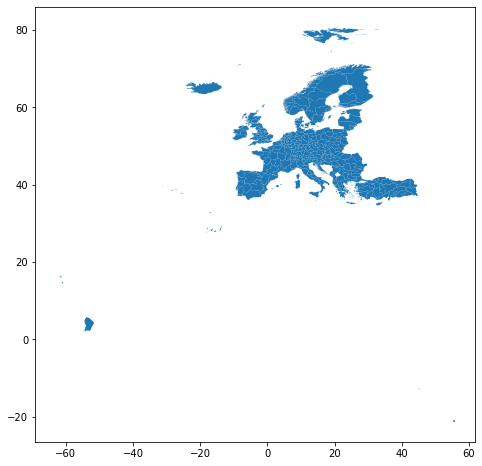

In [17]:
print(len(gdf_from_geojson))
gdf_from_geojson.plot(figsize=(8, 8))

325


<AxesSubplot:>

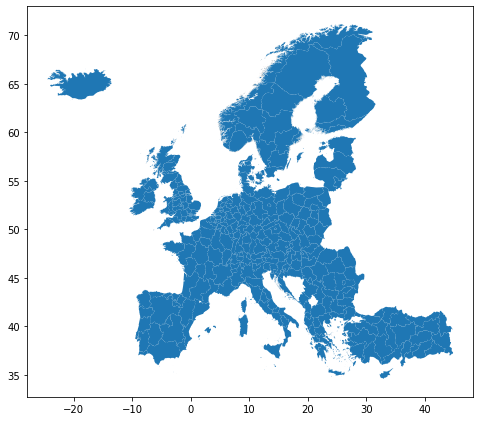

In [18]:
nuts2_gdf = gdf_from_geojson.cx[-15:, 34:70]
print(len(nuts2_gdf))
nuts2_gdf.plot(figsize=(8, 8))

<AxesSubplot:>

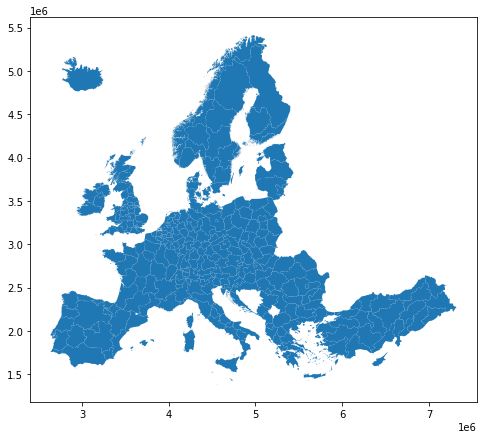

In [19]:
nuts2_gdf = nuts2_gdf.to_crs("EPSG:3035")
nuts2_gdf.plot(figsize=(8, 8))
#© EuroGeographics for the administrative boundaries

## Join the dataset to the NUTS2 GeoDataFrame

Rename the column ```'geo\TIME_PERIOD'``` to ```'NUTS_ID'```.

In [20]:
data.rename(columns = {'geo\TIME_PERIOD':'NUTS_ID'}, inplace = True)
data.head()

,freq,category,unit,NUTS_ID,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0


Join the ```nuts2_gdf``` GeoDataFrame with the ```data``` DataFrame using key ```'NUTS_ID'```.

In [21]:
nuts2_gdf_hrst = nuts2_gdf.merge(data, on='NUTS_ID')
nuts2_gdf_hrst.head()

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry,freq,category,unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((4292253.705 2923819.973, 42898...",A,HRST,PC_ACT,45.7,46.8,47.1,47.3,48.3,48.5,48.7,48.4,50.5,50.7,51.4,52.2
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((4217105.198 2744025.879, 42176...",A,HRST,PC_ACT,42.0,42.2,44.2,45.3,45.9,47.6,48.3,49.7,51.6,52.0,51.4,50.4
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((4685657.738 3058491.488, 46853...",A,HRST,PC_ACT,34.4,36.7,36.6,37.3,37.1,36.6,38.0,40.0,39.1,39.2,40.0,39.6
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((4075295.021 2643018.666, 40722...",A,HRST,PC_ACT,49.5,50.2,50.3,51.0,51.2,52.8,54.7,55.2,55.9,55.7,54.8,54.4
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((3975414.370 3077940.643, 3974754.391...",A,HRST,PC_ACT,55.2,56.1,54.8,56.6,56.3,58.3,61.9,59.1,60.6,63.1,65.1,62.7


Print the number of rows in this newly merged GeoDataFrame.

In [22]:
print(len(nuts2_gdf_hrst))

321


Why is there 4 less rows compared to the original GeoDataFrame (321 vs 325)? It's because the eurostat dataset didn't have the data for all NUTS2. Get the ```'NUTS_ID'``` of each of those 4 NUTS2 that are missing in the eurostat dataset.

In [23]:
nuts2_gdf_id_list = nuts2_gdf['NUTS_ID'].tolist()
nuts2_gdf_hrst_id_list = nuts2_gdf_hrst['NUTS_ID'].tolist()

difference = []
for id in nuts2_gdf_id_list:
    if id not in nuts2_gdf_hrst_id_list:
        difference.append(id)

difference

['AL01', 'AL02', 'AL03', 'LI00']

Set the ```'NUTS_ID'``` as the GeoDataFrame index and show the 4 missing NUTS2 in a table and on a map.

In [24]:
nuts2_gdf.set_index('NUTS_ID', inplace=True)
nuts2_gdf.loc[difference, :]

,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry
NUTS_ID,,,,
AL01,AL,Veri,Veri,"POLYGON ((5129579.218 2204098.703, 5129899.812..."
AL02,AL,Qender,Qender,"POLYGON ((5178239.016 2085653.856, 5180303.196..."
AL03,AL,Jug,Jug,"MULTIPOLYGON (((5211962.703 2061668.486, 52149..."
LI00,LI,Liechtenstein,Liechtenstein,"POLYGON ((4292201.681 2670971.921, 4292532.342..."


<AxesSubplot:>

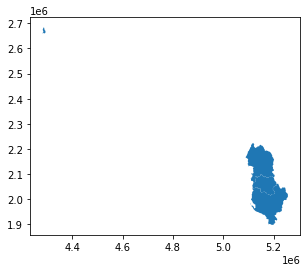

In [25]:
nuts2_gdf.loc[difference, :].plot()

In [ ]:
# to reset index back to default integers, use the reset_index() function
#nuts2_gdf.reset_index()

## Statistics

Find maximum, [**minimum**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), median and mean value in 2022.

In [26]:
min_series = nuts2_gdf_hrst.min(numeric_only=True)
min_indices = nuts2_gdf_hrst.idxmin(numeric_only=True)
print(min_series)
nuts2_gdf_hrst.loc[min_indices, ('NUTS_ID','NUTS_NAME','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022')]

2011     9.6
2012    11.7
2013    10.5
2014    10.2
2015    10.1
2016    11.0
2017    12.0
2018    12.5
2019    14.1
2020    15.6
2021    19.7
2022    21.7
dtype: float64


,NUTS_ID,NUTS_NAME,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
296,TRA2,"Ağrı, Kars, Iğdır, Ardahan",9.6,11.7,10.5,10.4,13.1,12.2,12.9,12.5,14.1,19.4,NaN,NaN
288,TRC2,"Şanlıurfa, Diyarbakır",15.1,11.7,13.1,11.9,13.1,15.1,17.2,16.7,17.6,19.1,NaN,NaN
296,TRA2,"Ağrı, Kars, Iğdır, Ardahan",9.6,11.7,10.5,10.4,13.1,12.2,12.9,12.5,14.1,19.4,NaN,NaN
291,TRB2,"Van, Muş, Bitlis, Hakkari",12.2,12.3,11.3,10.2,10.1,11.0,12.0,14.8,18.5,19.8,NaN,NaN
291,TRB2,"Van, Muş, Bitlis, Hakkari",12.2,12.3,11.3,10.2,10.1,11.0,12.0,14.8,18.5,19.8,NaN,NaN
291,TRB2,"Van, Muş, Bitlis, Hakkari",12.2,12.3,11.3,10.2,10.1,11.0,12.0,14.8,18.5,19.8,NaN,NaN
291,TRB2,"Van, Muş, Bitlis, Hakkari",12.2,12.3,11.3,10.2,10.1,11.0,12.0,14.8,18.5,19.8,NaN,NaN
296,TRA2,"Ağrı, Kars, Iğdır, Ardahan",9.6,11.7,10.5,10.4,13.1,12.2,12.9,12.5,14.1,19.4,NaN,NaN
296,TRA2,"Ağrı, Kars, Iğdır, Ardahan",9.6,11.7,10.5,10.4,13.1,12.2,12.9,12.5,14.1,19.4,NaN,NaN
100,RO21,Nord-Est,17.4,17.9,16.5,17.0,15.1,15.8,16.3,16.9,15.9,15.6,19.7,21.7


In [27]:
nuts2_gdf_hrst.sort_values('2011', inplace=True)
nuts2_gdf_hrst.loc[:, ('NUTS_ID', 'NAME_LATN', '2011')]

,NUTS_ID,NAME_LATN,2011
296,TRA2,"Ağrı, Kars, Iğdır, Ardahan",9.6
291,TRB2,"Van, Muş, Bitlis, Hakkari",12.2
295,TRC1,"Gaziantep, Adıyaman, Kilis",13.0
287,TR82,"Kastamonu, Çankırı, Sinop",13.9
307,TR33,"Manisa, Afyonkarahisar, Kütahya, Uşak",14.1
...,...,...,...
304,HR06,Sjeverna Hrvatska,NaN
314,NO08,Oslo og Viken,NaN
316,NO09,Agder og Sør-Østlandet,NaN
317,NO0A,Vestlandet,NaN


In [28]:
nuts2_gdf_hrst.loc[:, ('NUTS_ID', 'NAME_LATN', '2011')].notnull()

,NUTS_ID,NAME_LATN,2011
296,True,True,True
291,True,True,True
295,True,True,True
287,True,True,True
307,True,True,True
...,...,...,...
304,True,True,False
314,True,True,False
316,True,True,False
317,True,True,False


In [45]:
gdf_2011 = nuts2_gdf_hrst.dropna(subset='2022')
gdf_2011.loc[:, ('NUTS_ID', 'NAME_LATN', '2022')]

,NUTS_ID,NAME_LATN,2022
100,RO21,Nord-Est,21.7
224,RO41,Sud-Vest Oltenia,27.9
132,RO31,Sud-Muntenia,23.6
143,RO22,Sud-Est,24.3
106,PT16,Centro (PT),38.7
...,...,...,...
304,HR06,Sjeverna Hrvatska,31.8
314,NO08,Oslo og Viken,61.1
316,NO09,Agder og Sør-Østlandet,52.4
317,NO0A,Vestlandet,56.6


<AxesSubplot:>

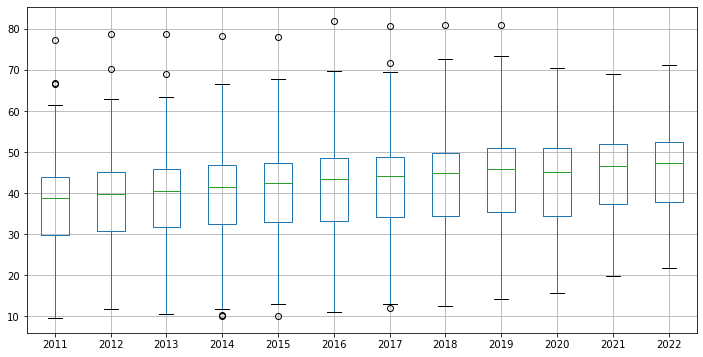

In [29]:
nuts2_gdf_hrst.boxplot(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], figsize=(12,6))

<AxesSubplot:>

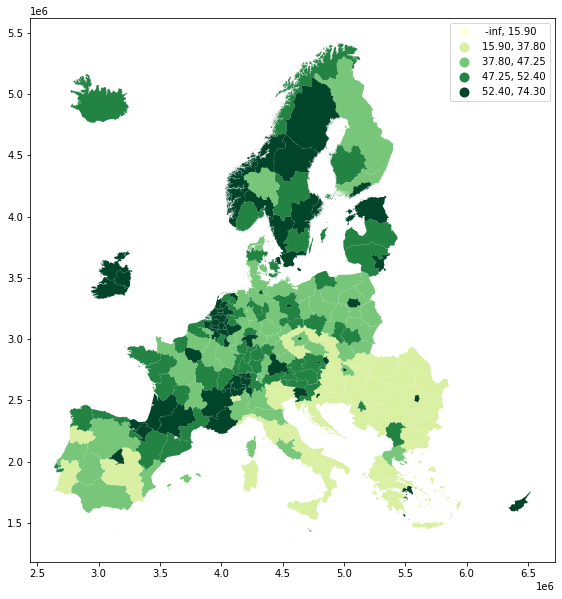

In [52]:
nuts2_gdf_hrst.plot(column='2022', cmap='YlGn', legend=True, scheme='BoxPlot', k=5, figsize=(10,10))

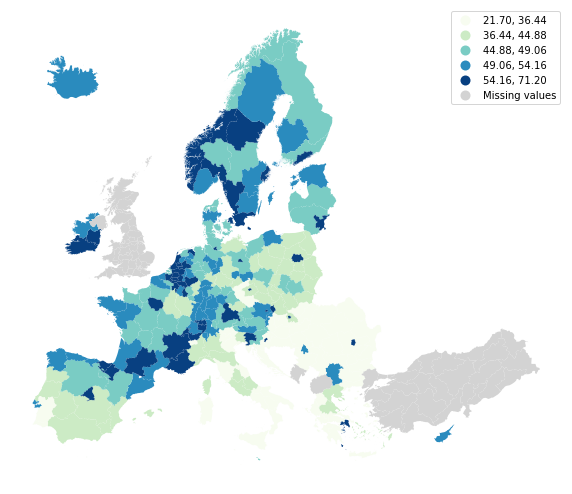

In [98]:
ax = nuts2_gdf_hrst.plot(column='2022', cmap='GnBu', legend=True, scheme='Quantiles', k=5, figsize=(10,10), 
                         missing_kwds={"color": "lightgrey", "label": "Missing values"})

#ax.set_facecolor('#e1f1fc')
ax.set_axis_off()

In [74]:
import folium

In [107]:
m = folium.Map([49.5, 18.0], zoom_start=4, tiles="cartodbpositron", control_scale=True)

# nuts2
""" folium.GeoJson(
    nuts2_gdf_hrst,
    name = "NUTS2", 
    style_function = lambda feature: {
        "fillColor": "#f5b30c",
        "color": "orange",
        "weight": 1
    }
).add_to(m) """

folium.Choropleth(
    geo_data=nuts2_gdf_hrst,
    data=nuts2_gdf_hrst,
    columns=["NUTS_NAME", "2022"],
    key_on="feature.id"
).add_to(m)

# menu in the top right corner where you can turn on and off the map layers
folium.LayerControl().add_to(m)
# display the map
m

ValueError: key_on `'NUTS_ID'` not found in GeoJSON.